<a href="https://colab.research.google.com/github/IvanDaniarAP/MLTask/blob/main/Week2/Regression_Public_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as pl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('/content/insurance.csv')

In [54]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [55]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [56]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates())
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates())
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates())
data.region = le.transform(data.region)

In [57]:
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

<Axes: >

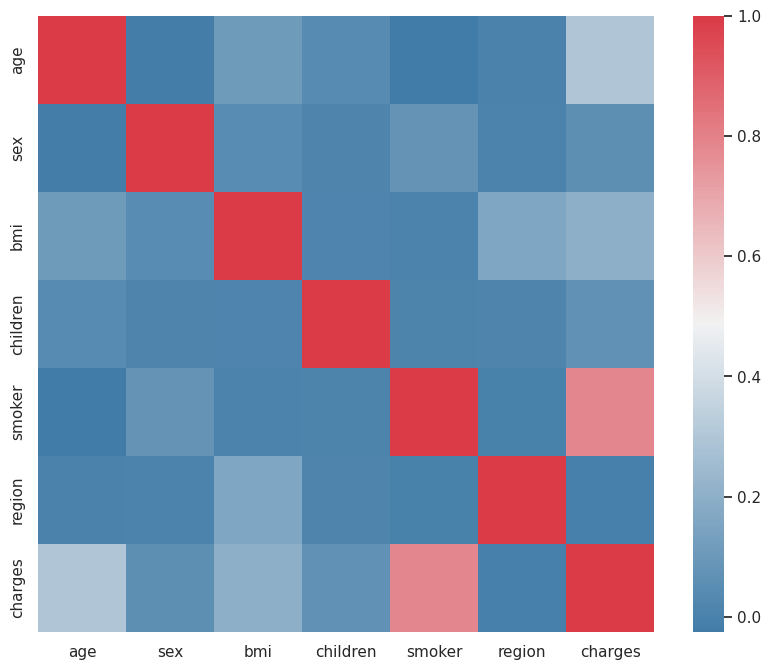

In [58]:
f, ax = pl.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

In [59]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
import scipy.special
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file

In [60]:
from bokeh.plotting import figure, show
import numpy as np

# Assuming you have your data and histogram calculations ready
hist, edges = np.histogram(data.charges)

p = figure(title="Distribution of charges", tools="save",
           background_fill_color="#E8DDCB")
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
       fill_color="#036564", line_color="#033649")
p.xaxis.axis_label = 'x'
p.yaxis.axis_label = 'Pr(x)'

show(p)  # Show the figure


Text(0.5, 1.0, 'Distribution of charges for non-smokers')

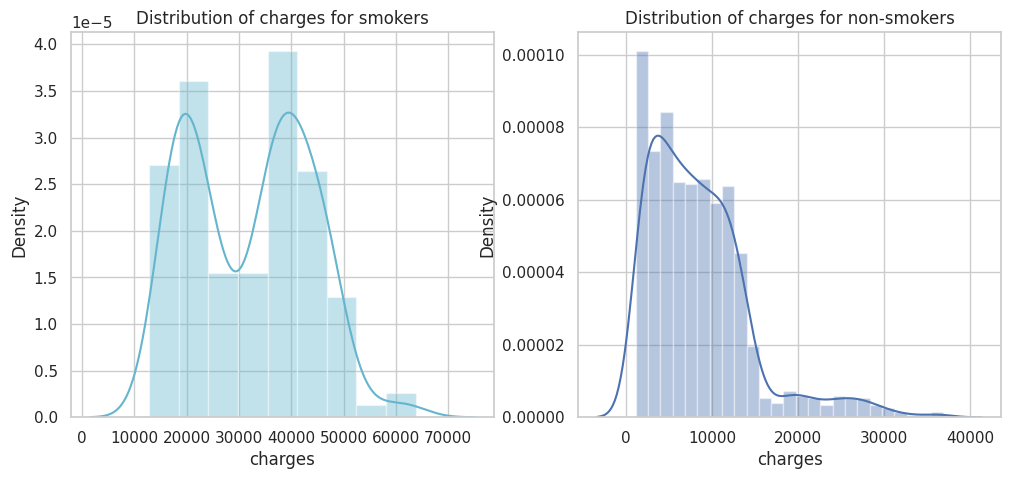

In [61]:
f= pl.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

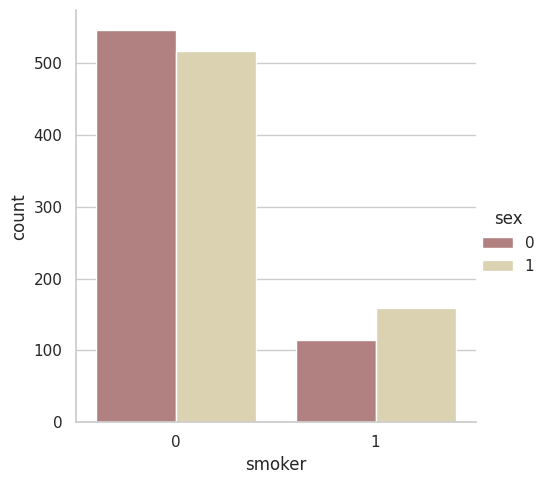

In [62]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=data)

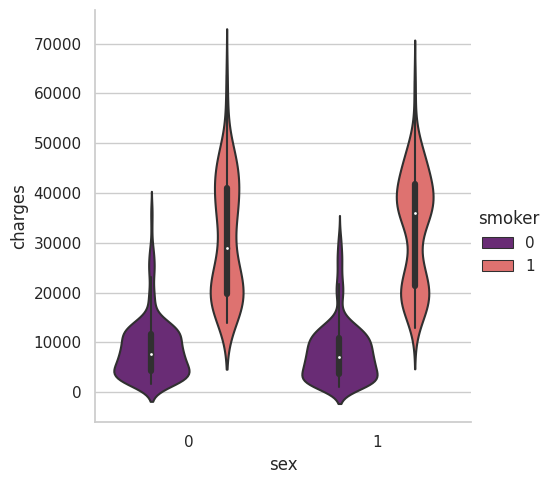

In [63]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=data, palette = 'magma')

<Axes: title={'center': 'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

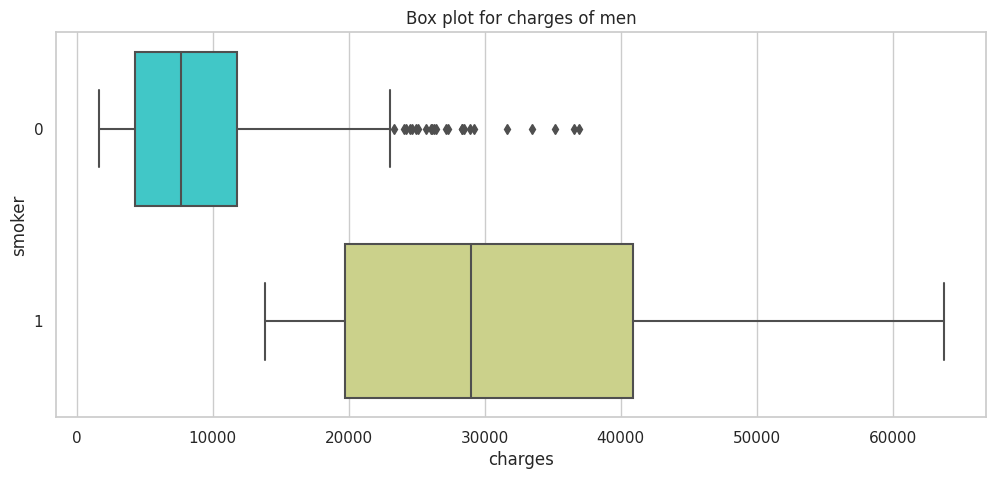

In [64]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 0)] , orient="h", palette = 'rainbow')

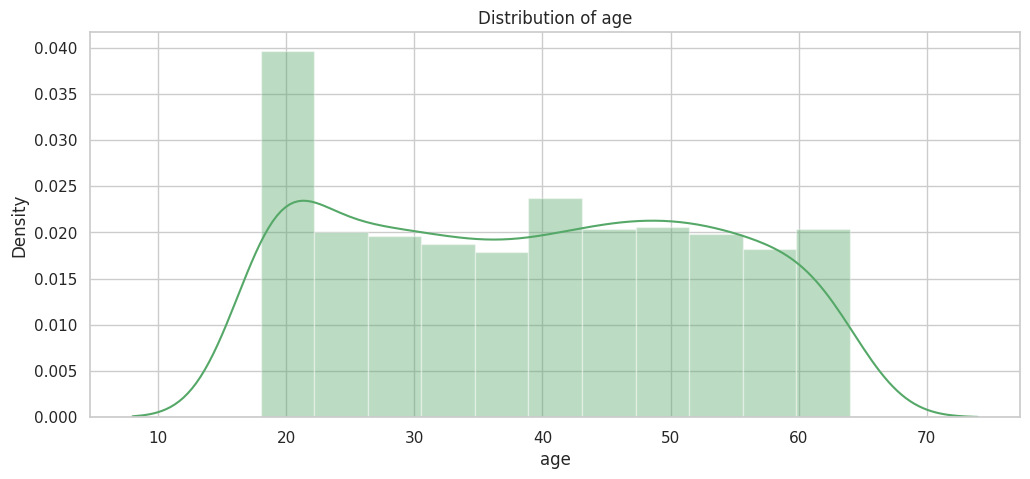

In [65]:
pl.figure(figsize=(12,5))
pl.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'g')

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

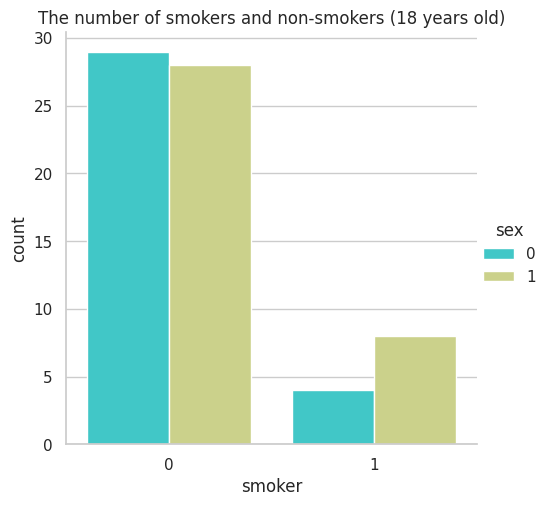

In [66]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=data[(data.age == 18)])
pl.title("The number of smokers and non-smokers (18 years old)")

<Axes: title={'center': 'Box plot for charges 18 years old smokers'}, xlabel='charges', ylabel='smoker'>

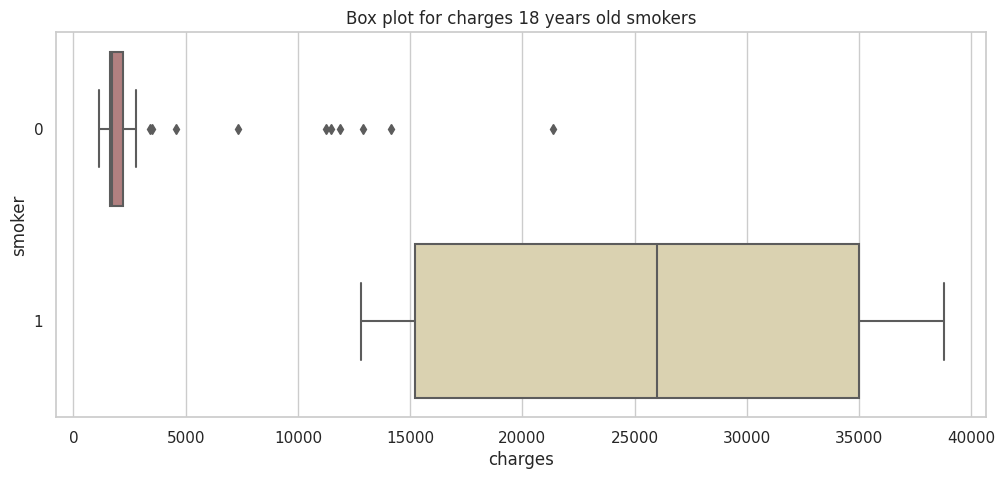

In [67]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = data[(data.age == 18)] , orient="h", palette = 'pink')

Text(0.5, 1.0, 'Distribution of charges and age for non-smokers')

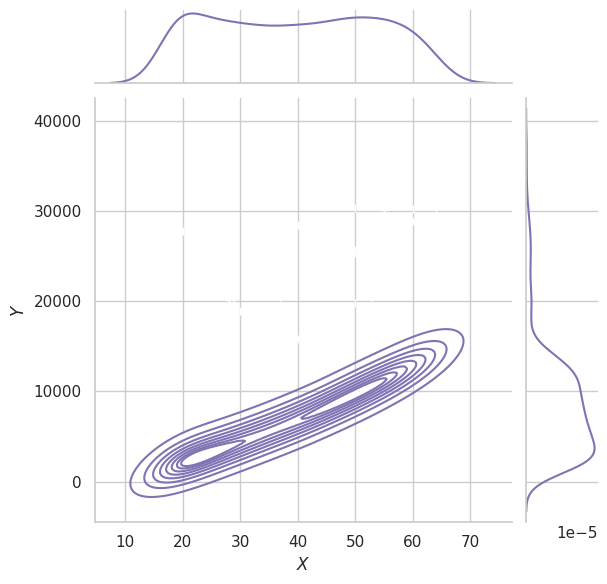

In [68]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 0)],kind="kde", color="m")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for non-smokers')

Text(0.5, 1.0, 'Distribution of charges and age for smokers')

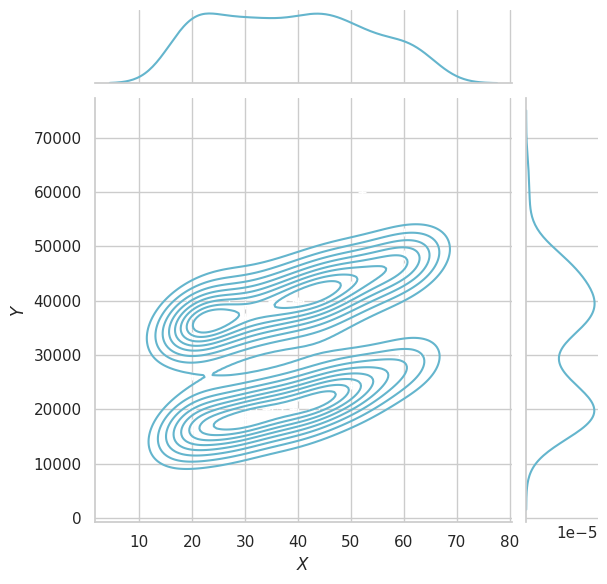

In [69]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 1)],kind="kde", color="c")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for smokers')

In [70]:
from bokeh.plotting import figure, show
import pandas as pd

# Pastikan Anda memiliki DataFrame 'data' yang sesuai dengan kolom 'age', 'charges', dan 'smoker'

# Scatter plot untuk non-smokers
p = figure(width=500, height=450, title="Scatter Plot for Non-Smokers")
p.circle(x=data[data.smoker == 0].age, y=data[data.smoker == 0].charges, size=7, line_color="navy", fill_color="pink", fill_alpha=0.9)

show(p)  # Tampilkan plot


In [71]:
#smokers
p = figure(width=500, height=450, title="Scatter Plot for Smokers")
p.circle(x=data[(data.smoker == 1)].age,y=data[(data.smoker == 1)].charges, size=7, line_color="navy", fill_color="red", fill_alpha=0.9)
show(p)

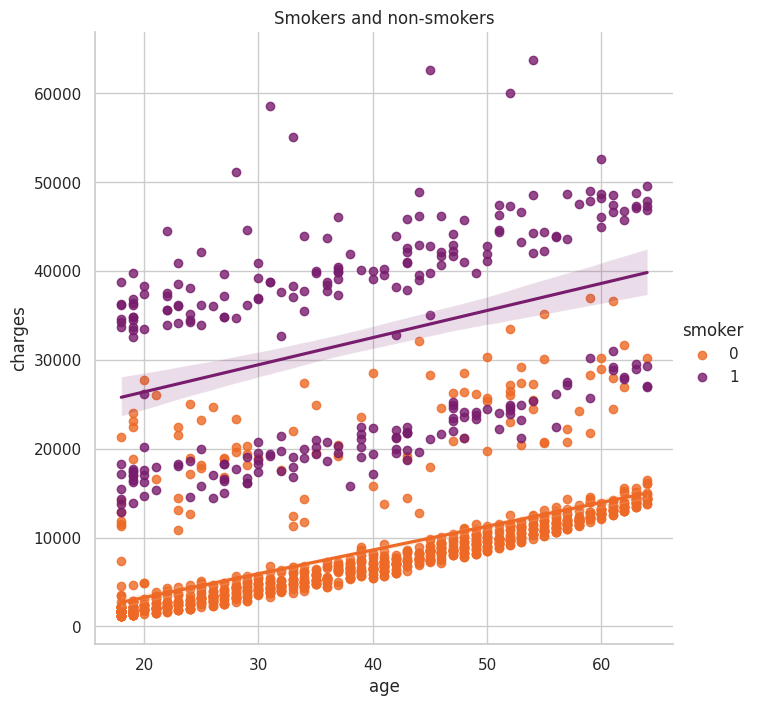

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your data DataFrame and necessary columns defined
# Replace 'data' with your actual DataFrame and columns as needed
# For example, if you have a DataFrame named 'data' with columns 'age', 'charges', and 'smoker'

# Create an lmplot with Seaborn
sns.set(style="whitegrid")  # Optional: Set the style
lm = sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette="inferno_r", height=7)
lm.set(title='Smokers and non-smokers')

plt.show()  # Show the plot


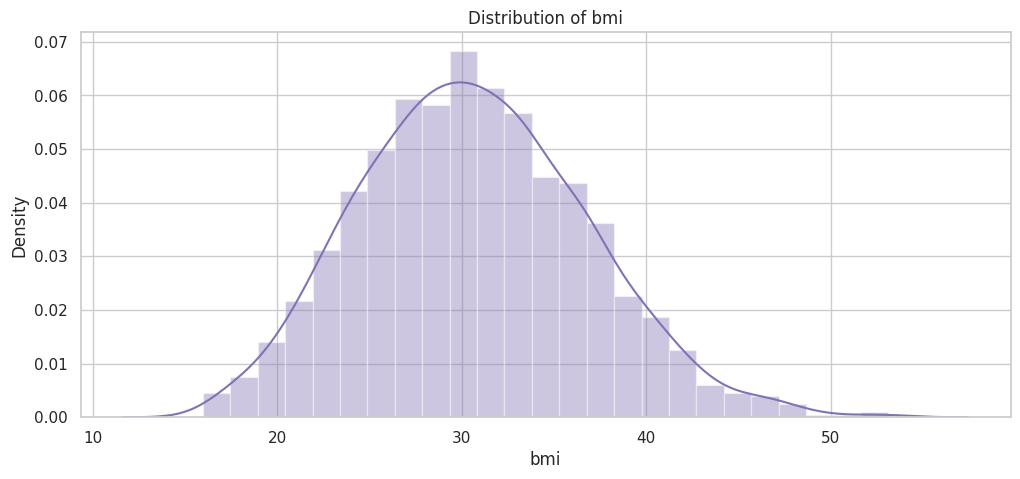

In [73]:
pl.figure(figsize=(12,5))
pl.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'm')

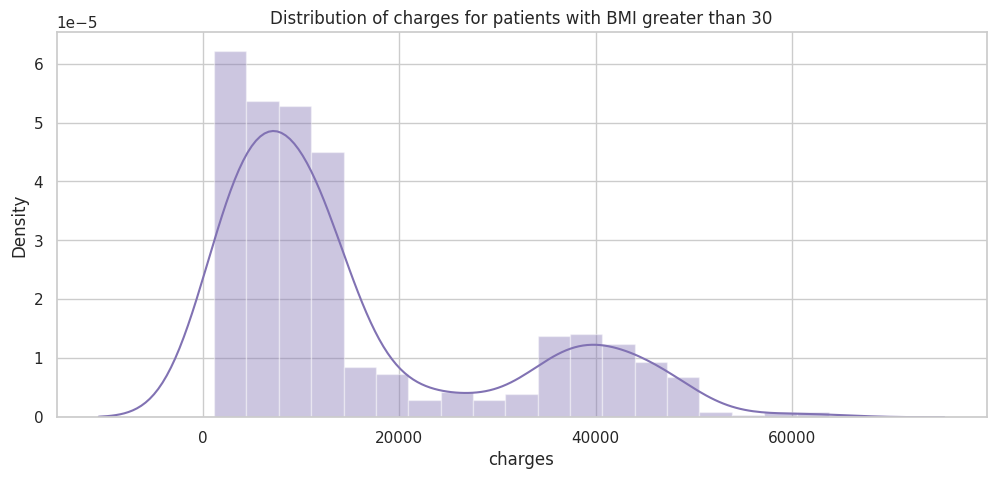

In [74]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'm')

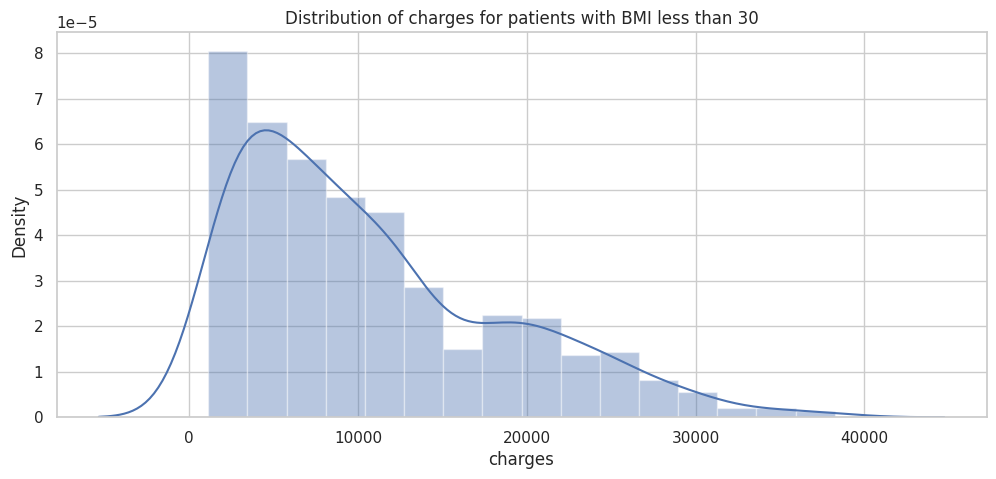

In [75]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(data[(data.bmi < 30)]['charges'], color = 'b')

Text(0.5, 1.0, 'Distribution of bmi and charges')

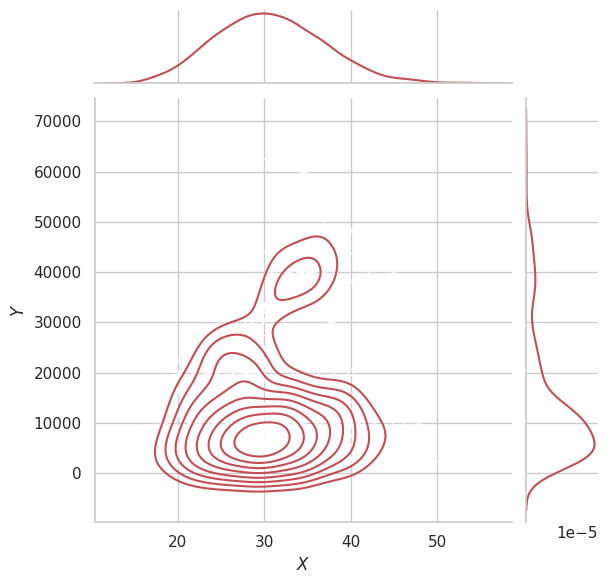

In [76]:
g = sns.jointplot(x="bmi", y="charges", data = data,kind="kde", color="r")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of bmi and charges')

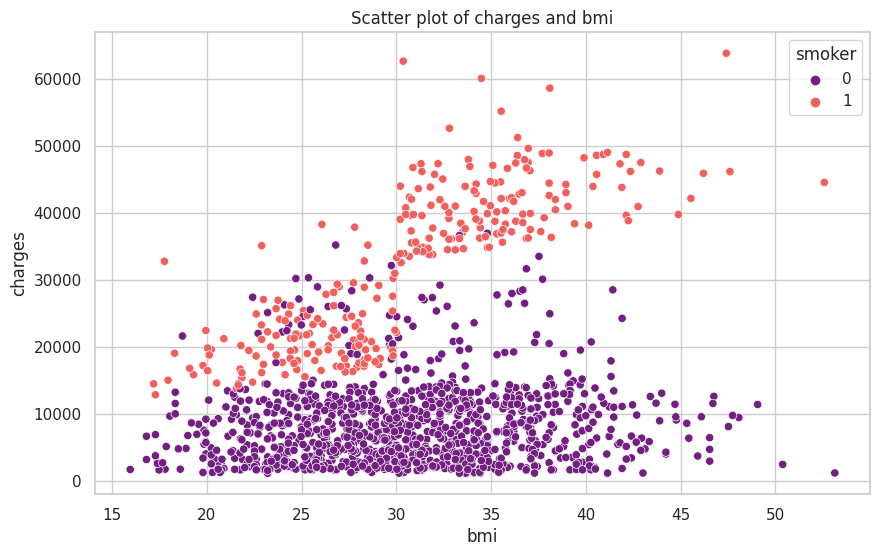

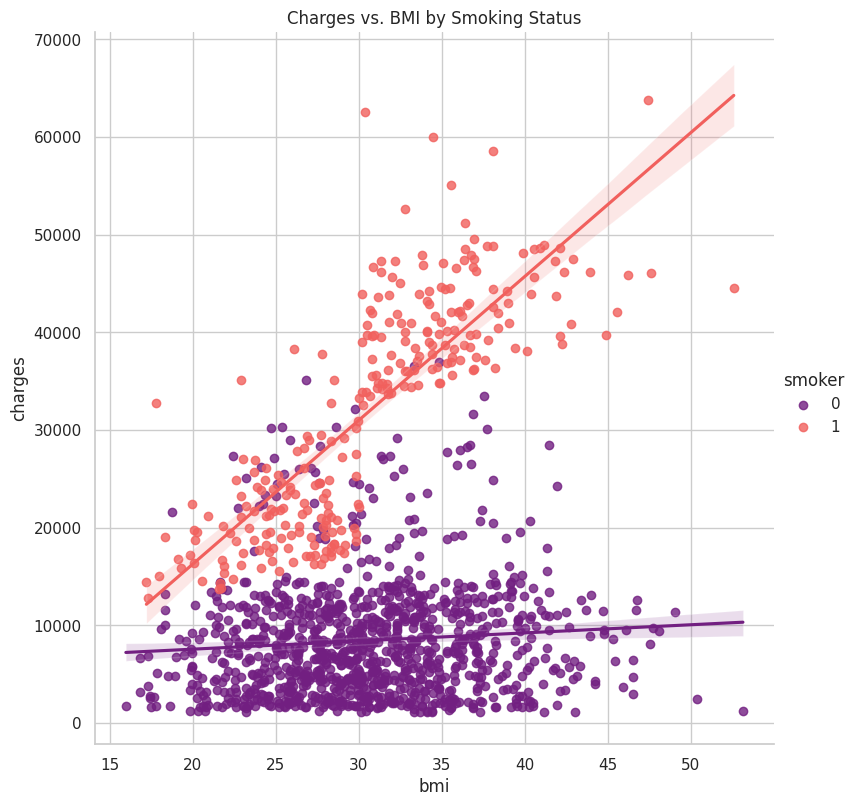

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your data DataFrame and necessary columns defined
# Replace 'data' with your actual DataFrame and columns as needed
# For example, if you have a DataFrame named 'data' with columns 'bmi', 'charges', and 'smoker'

# Create a scatter plot
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='bmi', y='charges', data=data, palette='magma', hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

# Create an lmplot
sns.set(style="whitegrid")  # Optional: Set the style
lm = sns.lmplot(x="bmi", y="charges", hue="smoker", data=data, palette="magma", height=8)
lm.set(title='Charges vs. BMI by Smoking Status')

plt.show()  # Show the plots


<Figure size 800x600 with 0 Axes>

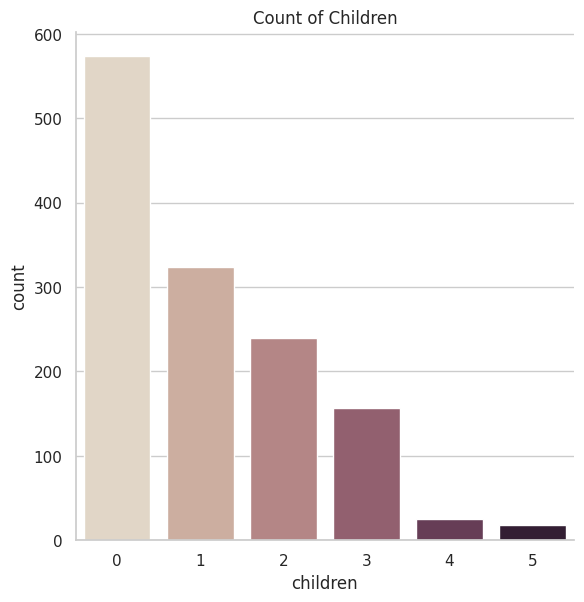

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your data DataFrame and the 'children' column defined
# Replace 'data' with your actual DataFrame and columns as needed

# Create a count plot
sns.set(style="whitegrid")  # Optional: Set the style
plt.figure(figsize=(8, 6))  # Set the figure size
sns.catplot(x="children", kind="count", palette="ch:.25", data=data, height=6)
plt.title('Count of Children')

plt.show()  # Show the plot


<Figure size 800x600 with 0 Axes>

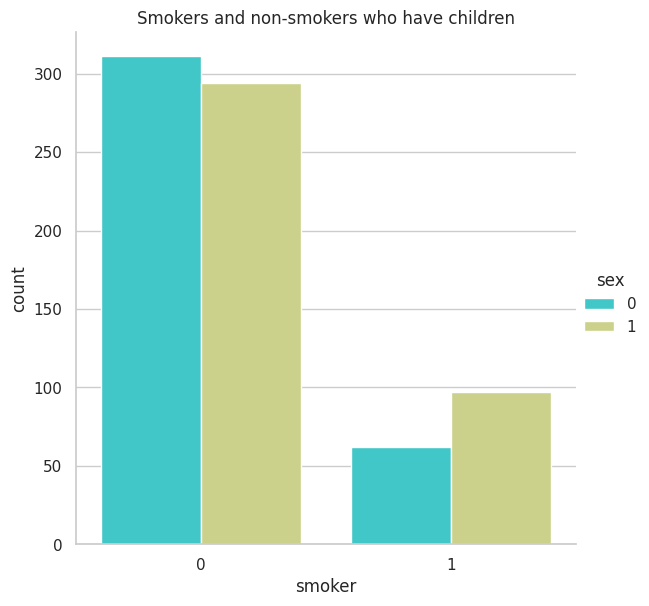

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your data DataFrame and necessary columns defined
# Replace 'data' with your actual DataFrame and columns as needed
# For example, if you have a DataFrame named 'data' with columns 'smoker', 'sex', and 'children'

# Create a count plot
plt.figure(figsize=(8, 6))  # Set the figure size
sns.set(style="whitegrid")  # Optional: Set the style
sns.catplot(x="smoker", kind="count", palette="rainbow", hue="sex",
            data=data[data.children > 0], height=6)
plt.title('Smokers and non-smokers who have children')

plt.show()  # Show the plot


In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [93]:
x = data.drop(['charges'], axis = 1)
y = data.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.7962732059725786


In [94]:
X = data.drop(['charges','region'], axis = 1)
Y = data.charges



quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.8849197344147227


In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Pastikan x_train, y_train, x_test, y_test telah didefinisikan dengan benar

forest = RandomForestRegressor(n_estimators=100,
                              criterion='squared_error',  # Ganti 'mse' menjadi 'squared_error' atau pilihan lain yang sesuai
                              random_state=1,
                              n_jobs=-1)
forest.fit(x_train, y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
    mean_squared_error(y_train, forest_train_pred),
    mean_squared_error(y_test, forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
    r2_score(y_train, forest_train_pred),
    r2_score(y_test, forest_test_pred)))


MSE train data: 3746684.434, MSE test data: 19965476.411
R2 train data: 0.974, R2 test data: 0.873


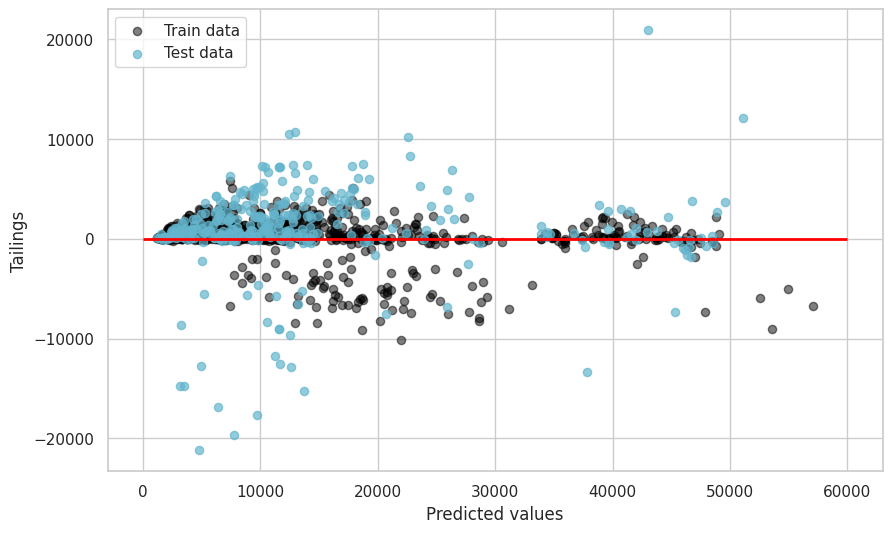

In [100]:
pl.figure(figsize=(10,6))

pl.scatter(forest_train_pred,forest_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
pl.scatter(forest_test_pred,forest_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
pl.xlabel('Predicted values')
pl.ylabel('Tailings')
pl.legend(loc = 'upper left')
pl.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
pl.show()
